$\rule{800pt}{20pt}$

# Instructions
<br>
<font size="+1">
    <ul>
        <li><b>Recommended Steps</b></li>
        <br>
        <ol>
            <li>Read the prompt and summarize the task in your own words, using as few words as possible for ease of comprehension.</li>
            <br>
            <li>Pretend to be the computer program that you are trying to create. Examine the smaple inputs and manually produce the appropriate results. Afterward, verify the correctness of your logic by comparing with the given sample outputs.</li>
            <br>
            <li>On a scrap piece of paper, write step-by-step instructions so that someone else can pretend to be the computer program and produce the appropriate results for any possible inputs. These instructions should target a human audience who does not know the problem description and only has your instructions as a guide. These instructions should serve as the roadmap for your code.</li>
            <br>
            <li>On another scrap piece of paper, write fragments of Python code to implement each step in your roadmap, focusing especially on the trickiest parts of the logic.</li>
            <br>
            <li>With your roadmap and code fragments from the previous steps, type Python code into a new Jupyter notebook cel to solve the given problem. You should type incrementally and run the code whenever you add a small chunk. This allows you to correct errors as they occur. It may also be helpful to print intermediate results to verify that the code is carrying out the logic as desired.</li>
            <br>
            <li>Run your code with some sample inputs and verify that the outputs are exactly the same as the sample outputs.</li>
            <br>
            <li>Once all of your problems are finished, it is useful to click <i>Kernel</i> $\rightarrow$ <i>Restart & Run All</i> to verify that your outputs for all of your problems continue to be correct. This helps to ensure that someone else will be able to replicate your results when running your notebook.</li>
            <br>
            <font color="red"><li style="color:red">Submit the <i>.ipynb</i> file on TurnItIn on Blackboard by the deadline. Be sure to refresh the page and double check your submission actually went through. <b>Note that you only need to submit your solutions, not all of the other recommended steps.</b> The recommended steps are meant to serve as a guide for your thinking process.</li></font>
            <br>
            <ul style="color:red">
            <font color="red"><li>Do your best to make sure that I will be able to run it.</li>
        <br>
        <li>For example, read in the CSV files from the current directory. I.e., do not write the full path of the file in your code. That will allow me to run your notebook in any directory on my own PC.</li>
        <br>
        <li>Please use Text/Markdown cells to help me understand what you are doing. (I know it may be obvious, but I want to see that you know how to use Text/Markdown.)</li>
        <br>
        <li><b>Some of the questions may be vague, you can either ask me for clarification, or clearly explain your interpretation to the question and your solution to your interpretation</b>. Remember, an important part of being a data scientist is communication and soft skills, so take this as an opportunity to exercise those skills.</li></font>
        <br>
            </ul>
        </ol>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li><b>Grading</b></li>
        <br>
        <li>There are four possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for $100%$ mastery of the material, as the little details matter in programming.</li>
        <br>
        <ul>
            <li>Grade of $5$ out of $5$ - perfect submission with no significant errors</li>
            <br>
            <li>Grade of $4$ out of $5$ - near perfect submission with one or more significant errors</li>
            <br>
            <li>Grade of $2$ out of $5$ - apparent effort but far from perfect</li>
            <br>
            <li>Grade of $0$ out of $5$ - no submission or no apparent effort</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

# Before You Begin
<br>
<font size="+1">
    <ul>
        <li>Please read the in-class notebooks realted to complexity in return prediction and building dense neural networks.</li>
        <br>
        <font color="red"><li><b>NOTE THAT THIS HOMEWORK ASSIGNMENT IS MORE CHALLENGING AND MORE VAUGE COMPARED TO OTHERS.</b></li></font>
        <br>
        <ul>
          <font color="red"><li><b>Simply try your best on the assignment, it is intended for you to learn in a somewhat unstructured setting where you can experiment with the concepts we have developed in class.</li></font>
          <br>
        </ul>
    </ul>
</font>

$\rule{800pt}{20pt}$

# Imports

In [ ]:
import os
import os.path
import time
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import cvxpy as cp

tf.keras.utils.set_random_seed(42)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content'

In [ ]:
images_path = '/content/drive/My Drive/DSO_464_Spring_2024/Images'

data_path = '/content/drive/My Drive/DSO_464_Spring_2024/05_Neural_Networks_for_Structured_Data_Dense_NNs_I_EX_Complexity_in_Stock_Returns_Predictions_for_Asset_and_Wealth_Management_and_Trading/Data'

In [ ]:
# tf.keras.preprocessing.image.load_img(os.path.join(images_path, 'add_any_images_using_this_code.png'))

$\rule{800pt}{20pt}$

# Cleaning Market Voaltility Data
<br>
<font size="+1">
  <ul>
    <li>In this exercise, you are to predict monthly S\&P 500 stock market <b>volatility</b> rather than <b>returns</b> (as we did in class).</li>
    <br>
  </ul>
</font>

$\square$

## Data
<br>
<font size="+1">
    <ul>
        <li><b>The forecast target is the monthly rolling standard deviation of the CRSP (Center for Research in Security Prices) S&P 500 value-weighted index, otherwise known as the volatility.</b></li>
        <br>
        <li>The features consist of 15 variables that are known to predict the stock market returns over time. They are fairly well known both in industry and in academia, and they were compiled by Goyal and Welch (2008).</li>
        <br>
        <li>The data sample ranges from 1926 to 2020.</li>
        <br>
        <li><details><summary>The following is a description of the variables from the 2008 Goyal & Welch paper.</summary>
        <br>
        <li>Variables used to construct the target variable.</li>
        <br>
        <ul>
          <li><b>Stock Returns:</b> We use S&P 500 index returns from 1926 to 2005 from Center for Research in Security Prices (CRSP) month-end values. Stock returns are the continuously compounded returns on the S&P 500 index, including dividends. For yearly and longer data frequencies, we can go back as far as 1871, using data from Robert Shiller's website. For monthly frequency, we can only begin in the CRSP period, that is, 1927.</li>
          <br>
          <li><b>Risk-free Rate:</b> The risk-free rate from 1920 to 2005 is the Treasury-bill rate. Treasury bills (or T-bills) are U.S. debt securities that mature over a time period of four weeks to one year. The most common terms for T-bills are for four, eight, 13, 17, 26 and 52 weeks. Because there was no risk-free short-term debt prior to the 1920s, we had to estimate it. Commercial paper rates for New York City are from the National Bureau of Economic Research (NBER) Macrohistory database. These are available from 1871 to 1970. We estimated a regression from 1920 to 1971, which yielded $$\text{Treasury-bill rate} = -0.004 + 0.886 \times \text{Commercial Paper Rate},$$ with an $R^2$ of $95.7\%$. Therefore, we <b>instrumented</b> the risk-free rate from 1871 to 1919 with the predicted regression equation. The correlation for the period 1920 to 1971 between the equity premium computed using the actual Treasury-bill rate and that computed using the predicted Treasury-bill rate (using the commercial paper rate) is $99.8\%$.</li>
          <br>
          <li>The equity premium had a mean (standard deviation) of $4.85\% (17.79%)$ over the entire sample from 1872 to 2005; $6.04\% (19.17\%)$ from 1927 to 2005; and $4.03\% (15.70\%)$ from 1965 to 2005.</li>
          <br>
        </ul>
        <li>Our first set of independent variables are primarily stock characteristics.</li>
        <br>
        <ul>
          <li><b>Dividends:</b> Dividends are 12-month moving sums of dividends paid on the S&P 500 index. The data are from Robert Shiller's website from 1871 to 1987. Dividends from 1988 to 2005 are from the S&P Corporation. The <b>Dividend Price Ratio (d/p)</b> is the difference between the log of dividends and the log of prices. The <b>Dividend Yield (d/y)</b> is the difference between the log of dividends and the log of lagged prices. (<i>See, e.g., Ball (1978), Campbell (1987), Campbell and Shiller (1988a, 1988b), Campbell and Viceira (2002), Campbell and Yogo (2006), the survey in Cochrane (1997), Fama and French (1988), Hodrick (1992), Lewellen (2004), Menzly, Santos, and Veronesi (2004), Rozeff (1984), and Shiller (1984).</i>)</li>
          <br>
          <li><b>Earnings:</b> Earnings are 12-month moving sums of earnings on the S&P 500 index. The data are again from Robert Shiller's website from 1871 to 1987. Earnings from 1988 to 2005 are our own estimates based on 1457 interpolation of quarterly earnings provided by the S&P Corporation. The <b>Earnings Price Ratio (e/p)</b> is the difference between the log of earnings and the log of prices. (We also consider variations, in which we explore multiyear moving averages of numerator or denominator, e.g., as in e10/p, which is the moving ten-year average of earnings divided by price.) The <b>Dividend Payout Ratio (d/e)</b> is the difference between the log of dividends and the log of earnings. (<i>See, e.g., Campbell and Shiller (1988a, 1998) and Lamont (1998).</i>)</li>
          <br>
          <li><b>Stock Variance (svar):</b> Stock Variance is computed as sum of squared daily returns on the S&P 500. G. William Schwert provided daily returns from 1871 to 1926; data from 1926 to 2005 are from CRSP. (<i>See Guo (2006).</i>)</li>
          <br>
          <li><b>Cross-Sectional Premium (csp):</b> The cross-sectional beta premium measures the relative valuations of high- and low-beta stocks and is proposed in Polk, Thompson, and Vuolteenaho (2006). The csp data are from Samuel Thompson from May 1937 to December 2002.</li>
          <br>
          <li>Book Value : Book values from 1920 to 2005 are from Value Line's website, specifically their Long-Term Perspective Chart of the Dow Jones Industrial Average. The <b>Book-to-Market Ratio (b/m)</b> is the ratio of book value to market value for the Dow Jones Industrial Average. For the months from March to December, this is computed by dividing book value at the end of the previous year by the price at the end of the current month. For the months of January and February, this is computed by dividing book value at the end of two years ago by the price at the end of the current month. (<i>See, e.g, Kothari and Shanken (1997) and Pontiff and Schall (1998).</i>)</li>
          <br>
          <li><b>Corporate Issuing Activity:</b> We entertain two measures osf corporate issuing activity. <b>Net Equity Expansion (ntis)</b> is the ratio of 12-month moving sums of net issues by NYSE listed stocks divided by the total end-of-year market capitalization of NYSE stocks. This dollar amount of net equity issuing activity (IPOs, SEOs, stock repurchases, less dividends) for NYSE listed stocks is computed from CRSP data as $$\text{Net Issue}_t = \text{Mcap}_t - \text{Mcap}_{t - 1} \times (1 + \text{vwretx}_t) ,$$ where Mcap is the total market capitalization, and vwretx is the value weighted return (excluding dividends) on the NYSE index. These data are available from 1926 to 2005. ntis is closely related, but not identical, to a variable proposed in Boudoukh, Michaely, Richardson, and Roberts (2007). The second measure, <b>Percent Equity Issuing (eqis)</b>, is the ratio of equity issuing activity as a fraction of total issuing activity. This is the variable proposed in Baker and Wurgler (2000). The authors provided us with the data, except for 2005, which we added ourselves. This calculation implicitly assumes that the delisting return is -100 percent. Using the actual delisting return, where available, or ignoring delistings altogether, has no impact on our results. The first equity issuing measure is relative to aggregate market cap, while the second is relative to aggregate corporate issuing.</li>
          <br>
        </ul>
        <li>Our next set of independent variables is interest-rate related.</li>
        <br>
        <ul>
          <li><b>Treasury Bills (tbl):</b> Treasury-bill rates from 1920 to 1933 are the U.S. Yields On Short-Term United States Securities, Three-Six Month Treasury Notes and Certificates, ThreeMonth Treasury series in the NBER Macrohistory data base. Treasury-bill rates from 1934 to 2005 are the 3-Month Treasury Bill: SecondaryMarket Rate from the economic research data base at the Federal Reserve Bank at St. Louis (FRED). (<i>See, e.g., Campbell (1987) and Hodrick (1992).</i>)</li>
          <br>
          <li><b>Long Term Yield (lty):</b> Our long-term government bond yield data from 1919 to 1925 is the U.S. Yield On Long-Term United States Bonds series in the NBER's Macrohistory data base. Yields from 1926 to 2005 are from Ibbotson's Stocks, Bonds, Bills and Inflation Yearbook, the same source that provided the <b>Long Term Rate of Returns (ltr)</b>. The <b>Term Spread (tms)</b> is the difference between the long term yield on government bonds and the Treasury-bill. (<i>See, e.g., Campbell (1987) and Fama and French (1989).</i>)</li>
          <br>
          <li><b>Corporate Bond Returns:</b> Long-term corporate bond returns from 1926 to 2005 are again from Ibbotson's Stocks, Bonds, Bills and Inflation Yearbook. Corporate Bond Yields on AAA and BAA-rated bonds from 1919 to 2005 are from FRED. The <b>Default Yield Spread (dfy)</b> is the difference between BAA and AAA-rated corporate bond yields. The <b>Default Return Spread (dfr)</b> is the difference between long-term corporate bond and long-term government bond returns. (<i>See, e.g., Fama and French (1989) and Keim and Stambaugh (1986).</i>)</li>
          <br>
          <li><b>Inflation (infl):</b> Inflation is the Consumer Price Index (All Urban Consumers) from 1919 to 2005 from the Bureau of Labor Statistics. Because inflation information is released only in the following month, we wait for one month before using it in our monthly regressions. <i>See, e.g., Campbell and Vuolteenaho (2004), Fama (1981), Fama and Schwert (1977), and Lintner (1975).</i>)</li>
          <br>
        </ul>
        <li>Like inflation, our next variable is also a common broad macroeconomic indicator.</li>
        <br>
        <ul>
          <li><b>Investment to Capital Ratio (i/k):</b> The investment to capital ratio is the ratio of aggregate (private nonresidential fixed) investment to aggregate capital for the whole economy. This is the variable proposed in Cochrane (1991). John Cochrane kindly provided us with updated data. Of course, many articles explore multiple variables. For example, Ang and Bekaert (2003) explore both interest rate and dividend related variables. In addition to simple univariate prediction models, we also entertain two methods that rely on multiple variables (all and ms), and two models that are rolling in their independent variable construction (cay and ms).</li>
          <br>
        </ul>
</li></details></li>
        <br>
        </ul>
    </ul>
</font>

$\square$

In [ ]:
# CRSP_SPvw includes dividends
# CRSP_SPvwx excluding dividends

# Note: Rapach, Zhou, Strauss calculate the equity premium using CRSP_SPvw (includes dividends) and lagged risk free rate
# Note: Goyal, Welch (2008) use Index and D12 and current risk free rate (not sure if they use lagged risk free rate or "current")

# This data list includes:
# b/m (book to market ratio),
# de (dividend payout ratio),
# dfr (default return spread; used to measure corporate bond returns relative to government bond returns),
# dfy (default yield spread; difference between BAA and AAA-rated corporate bond yields),
# dp (dividend price ratio),
# dy (dividend yield),
# ep (earnings price ratio),
# infl (inflation measured through the consumer price inded CPI),
# ltr (long-term bond rate of returns),
# lty (long-term bond yield),
# ntis (net equity expansion; a measure of corporate issuing activity),
# svar (stock variance),
# tbl (treasury bills),
# tms (term-spread),
# as well as one lag of the market return



COLUMNS = ["b/m", "de", "dfr", "dfy", "dp", "dy", "ep", "infl", "ltr", "lty", "ntis", "svar", "tbl", "tms", "returns_lag_1", "volatility_lag_1", "volatility"]


# def load_nber(data_path, file_name):
#     """Used to create a data set that you can use to investigate trends around recessions and other business cycles."""
#     nber = pd.read_csv(os.path.join(data_path, file_name))[1:]
#     nber["peak"] = pd.to_datetime(nber["peak"])
#     nber["trough"] = pd.to_datetime(nber["trough"])
#     return nber

def load_data(data_path, file_name):
    data_raw = pd.read_csv(os.path.join(data_path, file_name))
    data_raw["yyyymm"] = pd.to_datetime(data_raw["yyyymm"], format='%Y%m', errors='coerce')
    data_raw["Index"] = data_raw["Index"].str.replace(",", "")
    data_raw.set_index("yyyymm", inplace=True)
    data_raw[data_raw.columns] = data_raw[data_raw.columns].astype(float)
    data_raw.rename(columns={"Index":"prices"}, inplace=True)

    # Calculate missing columns according to the explaination in m Welch and Goyal (2008)
    data_raw["dfy"] = data_raw["BAA"] - data_raw["AAA"]
    data_raw["tms"] = data_raw["lty"] - data_raw["tbl"]
    data_raw["de"] = np.log(data_raw["D12"]) - np.log(data_raw["E12"])
    data_raw["dfr"] = data_raw["corpr"] - data_raw["ltr"]
    data_raw["lag_prices"] = data_raw["prices"].shift()
    data_raw["dp"] = np.log(data_raw["D12"]) - np.log(data_raw["prices"])
    data_raw["dy"] = np.log(data_raw["D12"]) - np.log(data_raw["lag_prices"])
    data_raw["ep"] = np.log(data_raw["E12"])  - np.log(data_raw["prices"])

    # All the variables should be lagged by at least one period so we are using a predictive regression, and not an explanatory / contemporaneous regression
    data_raw = data_raw.shift().copy()

    data_raw["returns"] = data_raw["CRSP_SPvw"] # data_raw["prices"].pct_change() # Maybe use CRSP_SPvw - Value weighted return
    data_raw["returns_lag_1"] = data_raw["returns"].shift()

    data_raw["volatility"] = data_raw["returns"].rolling(12).std()
    data_raw["volatility_lag_1"] = data_raw["volatility"].shift()
    # returns = data_raw["returns"].copy()

    data = data_raw[COLUMNS].dropna()
    # returns = returns[returns.index.isin(data.index)]
    return data # , returns

In [ ]:
# nber_data = load_nber(data_path, 'NBER_Cycle_Dates.csv') # if you want to investigate what the strategy does around recessions and other business cycles

data = load_data(data_path, 'Predictor_Data_Monthly_2022.csv')
# data = load_data('', 'Predictor_Data_Monthly_2022.csv')

In [ ]:
data

,b/m,de,dfr,dfy,dp,dy,ep,infl,ltr,lty,ntis,svar,tbl,tms,returns_lag_1,volatility_lag_1,volatility
yyyymm,,,,,,,,,,,,,,,,,
1927-02-01,0.443706,-0.567601,-0.0019,0.0095,-2.942374,-2.963349,-2.374773,-0.011299,0.0075,0.0351,0.050824,0.000470,0.0323,0.0028,0.026047,0.034465,0.034503
1927-03-01,0.428501,-0.549182,-0.0019,0.0092,-2.979535,-2.932946,-2.430353,-0.005714,0.0088,0.0347,0.051668,0.000287,0.0329,0.0018,-0.002910,0.034503,0.032960
1927-04-01,0.469765,-0.531456,-0.0170,0.0092,-2.976535,-2.970053,-2.445079,-0.005747,0.0253,0.0331,0.046357,0.000924,0.0320,0.0011,0.045522,0.032960,0.023652
1927-05-01,0.456754,-0.512916,0.0060,0.0090,-2.984225,-2.967143,-2.471309,0.000000,-0.0005,0.0333,0.050514,0.000603,0.0339,-0.0006,0.007324,0.023652,0.023181
1927-06-01,0.434783,-0.494518,-0.0120,0.0093,-3.025963,-2.975058,-2.531446,0.005780,0.0109,0.0327,0.055275,0.000392,0.0333,-0.0006,0.013021,0.023181,0.026061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.218187,-1.083898,0.0054,0.0115,-4.160174,-4.072973,-3.076276,-0.000118,0.0270,0.0290,-0.006121,0.003188,0.0223,0.0067,-0.081683,0.051478,0.058831
2022-09-01,0.227429,-1.068101,0.0128,0.0108,-4.110113,-4.153480,-3.042012,-0.000354,-0.0421,0.0290,-0.009732,0.003349,0.0263,0.0027,0.093766,0.058831,0.058788
2022-10-01,0.249478,-1.052264,0.0243,0.0110,-4.005414,-4.103464,-2.953150,0.002151,-0.0769,0.0352,-0.011292,0.004934,0.0313,0.0039,-0.040305,0.058788,0.062775


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
b/m,1151.0,0.552256,0.268388,0.120510,0.323766,0.529125,0.738711,2.028478
de,1151.0,-0.647532,0.327867,-1.244209,-0.869899,-0.637903,-0.501948,1.379530
dfr,1151.0,0.000454,0.014091,-0.097600,-0.005100,0.000600,0.005900,0.073700
dfy,1151.0,0.011161,0.006784,0.003200,0.007000,0.009000,0.013050,0.056400
dp,1151.0,-3.409075,0.476594,-4.523640,-3.846429,-3.375141,-3.044756,-1.873246
dy,1151.0,-3.404112,0.474482,-4.530894,-3.838413,-3.366944,-3.039537,-1.912904
ep,1151.0,-2.761543,0.420571,-4.836482,-2.986087,-2.810627,-2.482931,-1.774952
infl,1151.0,0.002469,0.005268,-0.020548,0.000000,0.002421,0.005087,0.058824
ltr,1151.0,0.004486,0.024963,-0.112400,-0.007650,0.003000,0.016100,0.152300
lty,1151.0,0.049668,0.028091,0.006200,0.027400,0.041000,0.067350,0.148200


In [ ]:
data.corr()

,b/m,de,dfr,dfy,dp,dy,ep,infl,ltr,lty,ntis,svar,tbl,tms,returns_lag_1,volatility_lag_1,volatility
b/m,1.000000,0.322088,-0.018084,0.470257,0.856847,0.850954,0.719893,0.079116,0.009898,0.193800,0.033190,0.168229,0.199485,-0.052038,-0.065958,0.344901,0.351066
de,0.322088,1.000000,0.079265,0.532186,0.504797,0.501986,-0.207536,-0.227198,-0.014050,-0.231959,0.149246,0.354923,-0.298259,0.203421,-0.028323,0.526453,0.533547
dfr,-0.018084,0.079265,1.000000,0.020098,-0.019921,0.000090,-0.084368,0.028547,-0.464957,-0.014044,0.013962,-0.134102,-0.044065,0.074012,0.105943,0.083004,0.076990
dfy,0.470257,0.532186,0.020098,1.000000,0.405020,0.400433,0.044092,-0.237287,0.073468,0.066644,-0.179955,0.535240,-0.060598,0.288591,-0.107316,0.715070,0.736681
dp,0.856847,0.504797,-0.019921,0.405020,1.000000,0.993531,0.739679,-0.030959,0.000715,0.008039,0.238844,0.166924,0.042437,-0.083200,-0.065315,0.295177,0.305002
dy,0.850954,0.501986,0.000090,0.400433,0.993531,1.000000,0.734540,-0.029045,0.009101,0.007356,0.231797,0.138210,0.041285,-0.081951,-0.056706,0.296264,0.305769
ep,0.719893,-0.207536,-0.084368,0.044092,0.739679,0.734540,1.000000,0.142035,0.011763,0.189939,0.154311,-0.087530,0.280605,-0.252865,-0.051935,-0.075914,-0.070309
infl,0.079116,-0.227198,0.028547,-0.237287,-0.030959,-0.029045,0.142035,1.000000,-0.102468,0.215382,-0.055981,-0.205088,0.247152,-0.118209,0.038014,-0.195955,-0.206446
ltr,0.009898,-0.014050,-0.464957,0.073468,0.000715,0.009101,0.011763,-0.102468,1.000000,0.056491,-0.046603,0.092946,0.054069,-0.005492,-0.079538,0.007641,0.015227
lty,0.193800,-0.231959,-0.014044,0.066644,0.008039,0.007356,0.189939,0.215382,0.056491,1.000000,-0.062099,-0.105096,0.906857,0.022038,-0.005007,-0.118301,-0.117095


In [ ]:
(abs(data.corr()[['volatility']])).sort_values(by='volatility', ascending=False)

,volatility
volatility,1.000000
volatility_lag_1,0.978363
dfy,0.736681
svar,0.565680
de,0.533547
b/m,0.351066
dy,0.305769
dp,0.305002
tms,0.207199
infl,0.206446


<Axes: xlabel='yyyymm'>

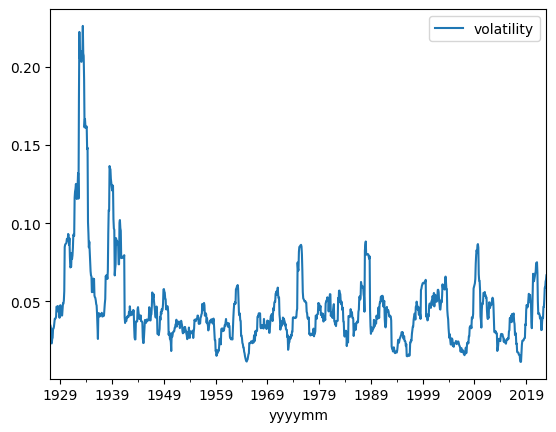

In [ ]:
data[['volatility']].plot()

In [ ]:
# percentage of the data used to train in a time-series split
training_percentage = 0.9

# number of samples, number of training samples, number of years in training set, number of years in testing set
data.shape[0], round(data.shape[0]* training_percentage), round(data.shape[0]* training_percentage) / 12, (data.shape[0] - round(data.shape[0]* training_percentage)) / 12

(1151, 1036, 86.33333333333333, 9.583333333333334)

In [ ]:
# split data sample into (X_{t-1}, Y_t)
X = data.drop(columns=['volatility'])
Y = data[['volatility']]

# split (X_{t-1}, Y_t) into time-series training and testing sets
X_train = X.iloc[0: round(data.shape[0]* training_percentage)]
X_test = X.iloc[round(data.shape[0]* training_percentage):]

Y_train = Y.iloc[0: round(data.shape[0]* training_percentage)]
Y_test = Y.iloc[round(data.shape[0]* training_percentage):]

##########################################################################################
##########################################################################################
##########################################################################################

X_sub_train = X_train.iloc[0: round(X_train.shape[0]* training_percentage)]
Y_sub_train = Y_train.iloc[0: round(X_train.shape[0]* training_percentage)]

X_validation = X_train.iloc[round(X_train.shape[0]* training_percentage):]
Y_validation = Y_train.iloc[round(X_train.shape[0]* training_percentage):]



## NOTE: in practice, you would do rolling predictions where you build a sequence of models, rather than just a single model at a single time-series split.

$\rule{800pt}{20pt}$

# Question 1: Build At Least FIVE Different Dense Neural Networks to Predict Volatility


- This focus of this question focuses on model architecture:

  - does a shallow, deep, wide, narrow, etc. model work best?

- You should test on the validation data and report your results about which architecture performed best.

- What periods of time does your model perform well in, and when does it perform poorly? Were they times of financial market stress?

array([[<Axes: title={'center': 'volatility'}>]], dtype=object)

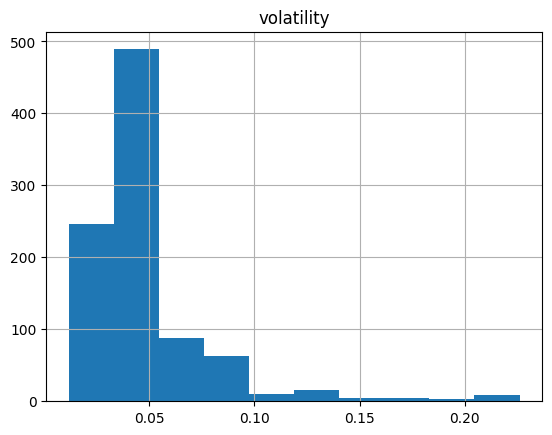

In [ ]:
pd.DataFrame(Y_sub_train).hist()

### Model 1 - Perceptron

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=1),
])


model1.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

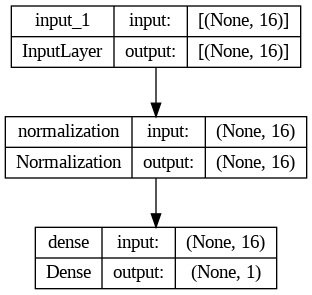

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
history1 = model1.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history1 = pd.DataFrame(history1.history)

Epoch 1/150
30/30 [==============================] - 1s 7ms/step - loss: 0.0680 - r2_score: -76.1414 - val_loss: 0.0702 - val_r2_score: -209.6056
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0324 - r2_score: -35.7212 - val_loss: 0.0562 - val_r2_score: -167.7766
Epoch 3/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0297 - r2_score: -32.6719 - val_loss: 0.0551 - val_r2_score: -164.4529
Epoch 4/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0271 - r2_score: -29.7337 - val_loss: 0.0513 - val_r2_score: -152.8083
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0246 - r2_score: -26.9502 - val_loss: 0.0455 - val_r2_score: -135.4879
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0223 - r2_score: -24.2901 - val_loss: 0.0415 - val_r2_score: -123.5096
Epoch 7/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0200 - r2_score: -21.7377 - val_loss: 0.0367 - va

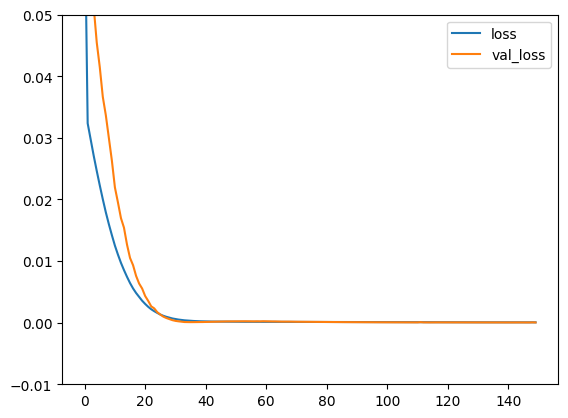

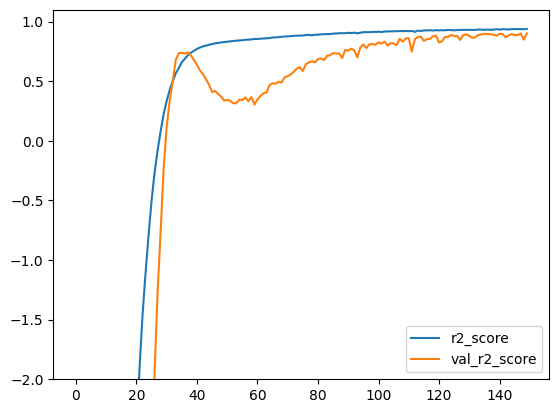

In [ ]:
history1[['loss', 'val_loss']].plot(ylim=[-0.01,0.05])
plt.show()

history1[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

### Model 2 - Multi-Layer Perceptron

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1),
])


model2.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

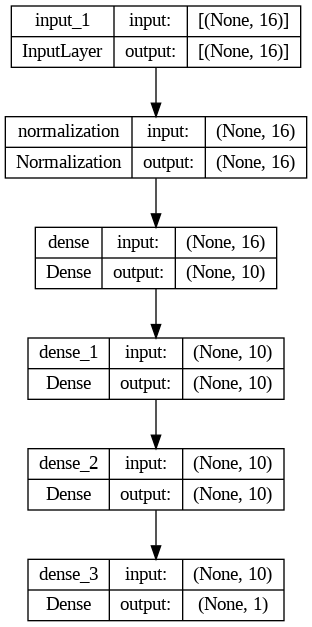

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
history2 = model2.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history2 = pd.DataFrame(history2.history)

Epoch 1/150
30/30 [==============================] - 1s 12ms/step - loss: 1.2119 - r2_score: -1374.0522 - val_loss: 0.4611 - val_r2_score: -1382.8434
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0838 - r2_score: -94.0523 - val_loss: 0.2783 - val_r2_score: -834.0779
Epoch 3/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0423 - r2_score: -46.9654 - val_loss: 0.2198 - val_r2_score: -658.6672
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0348 - r2_score: -38.4282 - val_loss: 0.1823 - val_r2_score: -546.0478
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0288 - r2_score: -31.6732 - val_loss: 0.1490 - val_r2_score: -446.0040
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0235 - r2_score: -25.7122 - val_loss: 0.1199 - val_r2_score: -358.8793
Epoch 7/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0190 - r2_score: -20.6119 - val_loss: 0.0950 

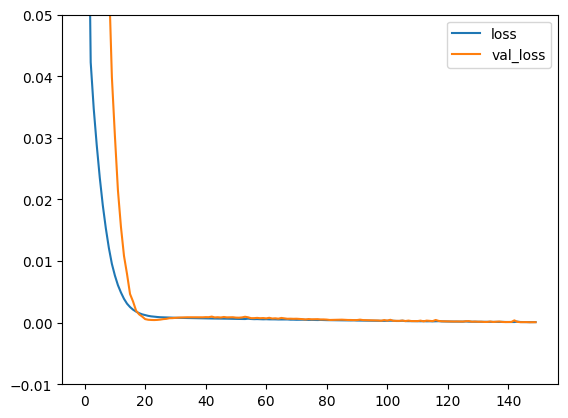

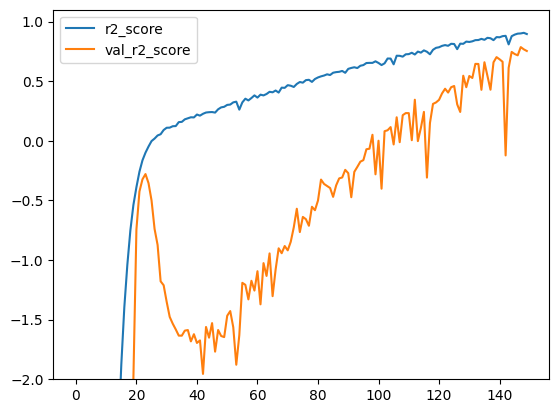

In [ ]:
history2[['loss', 'val_loss']].plot(ylim=[-0.01,0.05])
plt.show()

history2[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 3 - Shallow NN

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1)
])


model3.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

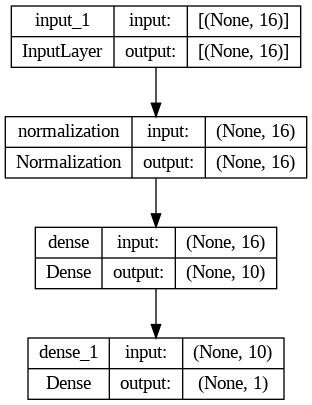

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
history3 = model3.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history3 = pd.DataFrame(history3.history)

Epoch 1/150
30/30 [==============================] - 1s 7ms/step - loss: 0.3250 - r2_score: -367.7752 - val_loss: 0.0077 - val_r2_score: -22.1913
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0111 - r2_score: -11.5645 - val_loss: 0.0167 - val_r2_score: -48.9766
Epoch 3/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0067 - r2_score: -6.6276 - val_loss: 0.0085 - val_r2_score: -24.4945
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0062 - r2_score: -5.9907 - val_loss: 0.0104 - val_r2_score: -30.2032
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0056 - r2_score: -5.3901 - val_loss: 0.0094 - val_r2_score: -27.1459
Epoch 6/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0051 - r2_score: -4.7769 - val_loss: 0.0093 - val_r2_score: -26.8504
Epoch 7/150
30/30 [==============================] - 0s 2ms/step - loss: 0.0046 - r2_score: -4.2027 - val_loss: 0.0084 - val_r2_score

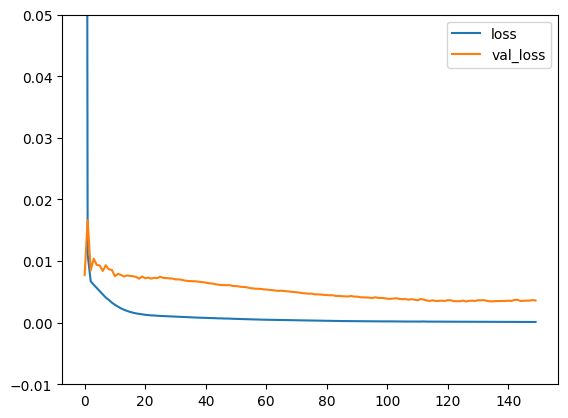

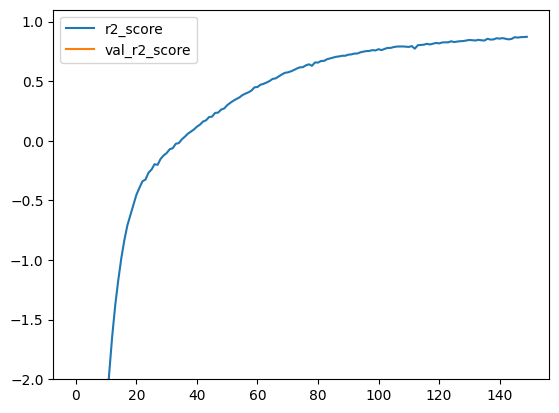

In [ ]:
history3[['loss', 'val_loss']].plot(ylim=[-0.01,0.05])
plt.show()

history3[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 4 - Deeper NN

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model4 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dense(units=1)
])


model4.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

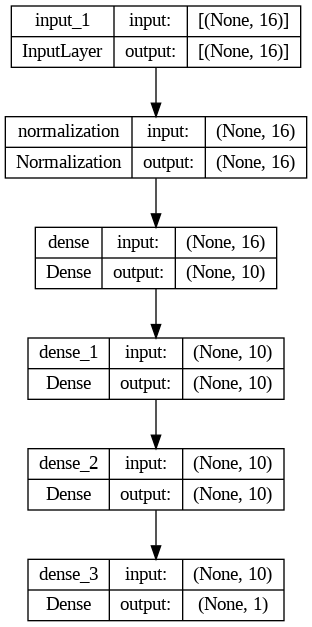

In [ ]:
tf.keras.utils.plot_model(model4, show_shapes=True, show_layer_names=True)

In [ ]:
history4 = model4.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history4 = pd.DataFrame(history4.history)

Epoch 1/150
30/30 [==============================] - 1s 9ms/step - loss: 1.5693 - r2_score: -1779.5557 - val_loss: 0.3698 - val_r2_score: -1108.7655
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0731 - r2_score: -81.9267 - val_loss: 0.0482 - val_r2_score: -143.5769
Epoch 3/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0130 - r2_score: -13.7450 - val_loss: 0.0197 - val_r2_score: -58.2583
Epoch 4/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0058 - r2_score: -5.5760 - val_loss: 0.0103 - val_r2_score: -29.8698
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0034 - r2_score: -2.9014 - val_loss: 0.0067 - val_r2_score: -19.0169
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0022 - r2_score: -1.5515 - val_loss: 0.0049 - val_r2_score: -13.8505
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0018 - r2_score: -0.9995 - val_loss: 0.0041 - val_r2_

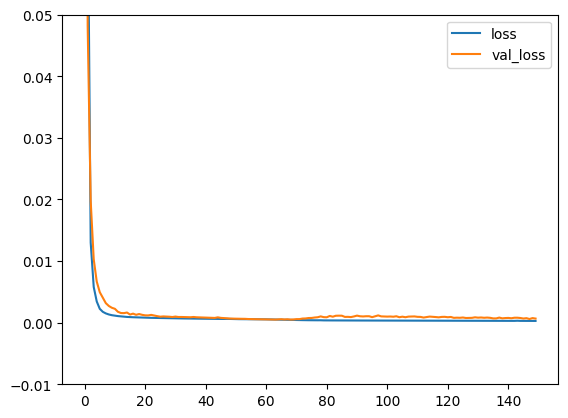

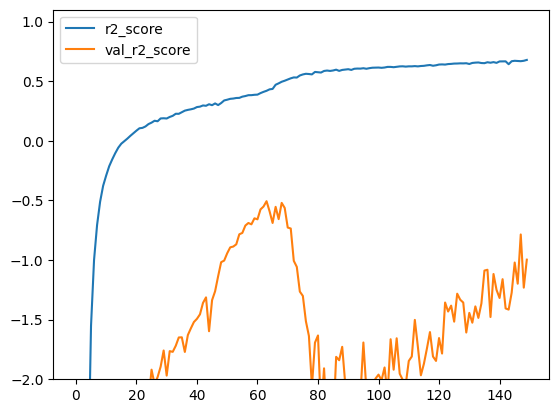

In [ ]:
history4[['loss', 'val_loss']].plot(ylim=[-0.01,0.05])
plt.show()

history4[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 5 - Deeper NN with Dropout

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=1)
])



model5.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

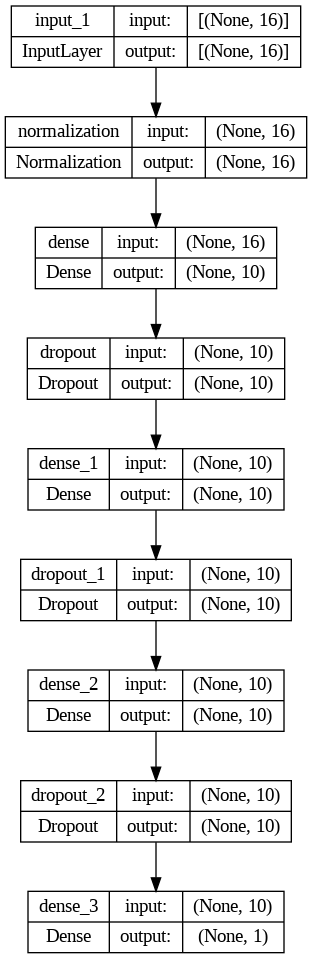

In [ ]:
tf.keras.utils.plot_model(model5, show_shapes=True, show_layer_names=True)

In [ ]:
history5 = model5.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history5 = pd.DataFrame(history5.history)

Epoch 1/300
30/30 [==============================] - 0s 13ms/step - loss: 9.2097e-04 - r2_score: -0.0449 - val_loss: 3.2253e-04 - val_r2_score: 0.0321
Epoch 2/300
30/30 [==============================] - 0s 8ms/step - loss: 8.8985e-04 - r2_score: -0.0096 - val_loss: 3.2868e-04 - val_r2_score: 0.0136
Epoch 3/300
30/30 [==============================] - 0s 8ms/step - loss: 9.1383e-04 - r2_score: -0.0368 - val_loss: 3.2888e-04 - val_r2_score: 0.0130
Epoch 4/300
30/30 [==============================] - 0s 3ms/step - loss: 8.3690e-04 - r2_score: 0.0504 - val_loss: 3.2584e-04 - val_r2_score: 0.0222
Epoch 5/300
30/30 [==============================] - 0s 3ms/step - loss: 8.9245e-04 - r2_score: -0.0126 - val_loss: 3.2809e-04 - val_r2_score: 0.0154
Epoch 6/300
30/30 [==============================] - 0s 3ms/step - loss: 8.9229e-04 - r2_score: -0.0124 - val_loss: 3.2665e-04 - val_r2_score: 0.0197
Epoch 7/300
30/30 [==============================] - 0s 3ms/step - loss: 8.8370e-04 - r2_score: -0.0

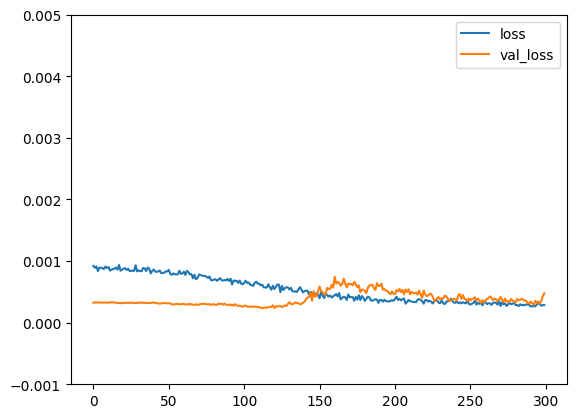

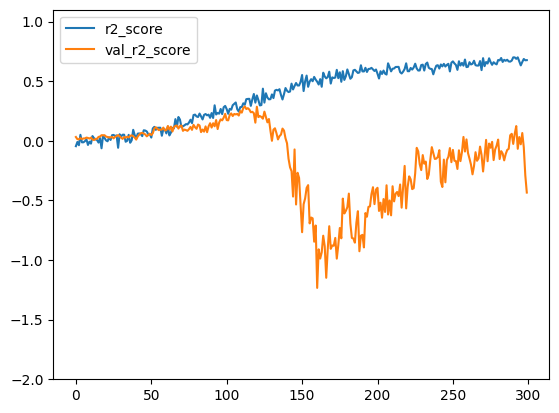

In [ ]:
history5[['loss', 'val_loss']].plot(ylim=[-0.001,0.005])
plt.show()

history5[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 6 - Deeper & Wider NN with Dropout

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)


model6 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1]),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1)

])



model6.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[tf.keras.metrics.R2Score()],
)

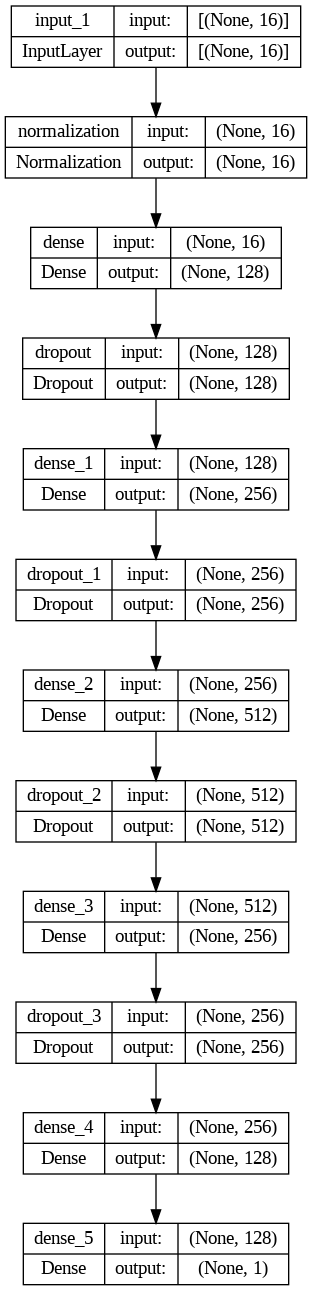

In [ ]:
tf.keras.utils.plot_model(model6, show_shapes=True, show_layer_names=True)

In [ ]:
history6 = model6.fit(X_sub_train, Y_sub_train, epochs=150, batch_size=32, validation_data=(X_validation, Y_validation), verbose=1)
history6 = pd.DataFrame(history6.history)

Epoch 1/150
30/30 [==============================] - 2s 12ms/step - loss: 0.0150 - r2_score: -16.0521 - val_loss: 3.0949e-04 - val_r2_score: 0.0712
Epoch 2/150
30/30 [==============================] - 0s 6ms/step - loss: 9.1997e-04 - r2_score: -0.0438 - val_loss: 1.5650e-04 - val_r2_score: 0.5304
Epoch 3/150
30/30 [==============================] - 0s 7ms/step - loss: 7.5450e-04 - r2_score: 0.1439 - val_loss: 6.3551e-04 - val_r2_score: -0.9071
Epoch 4/150
30/30 [==============================] - 0s 7ms/step - loss: 5.7151e-04 - r2_score: 0.3516 - val_loss: 8.2177e-04 - val_r2_score: -1.4661
Epoch 5/150
30/30 [==============================] - 0s 7ms/step - loss: 5.2762e-04 - r2_score: 0.4014 - val_loss: 5.1658e-04 - val_r2_score: -0.5502
Epoch 6/150
30/30 [==============================] - 0s 7ms/step - loss: 5.0681e-04 - r2_score: 0.4250 - val_loss: 0.0028 - val_r2_score: -7.4263
Epoch 7/150
30/30 [==============================] - 0s 7ms/step - loss: 4.3715e-04 - r2_score: 0.5040 - v

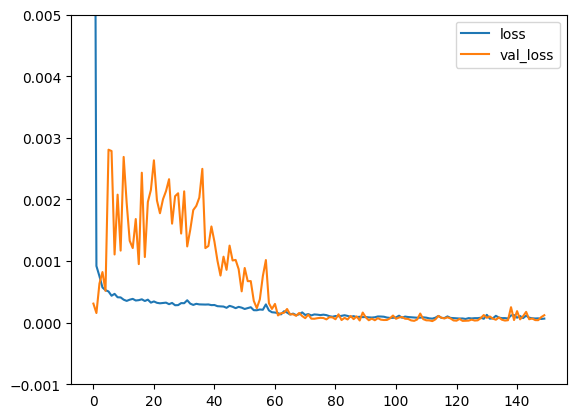

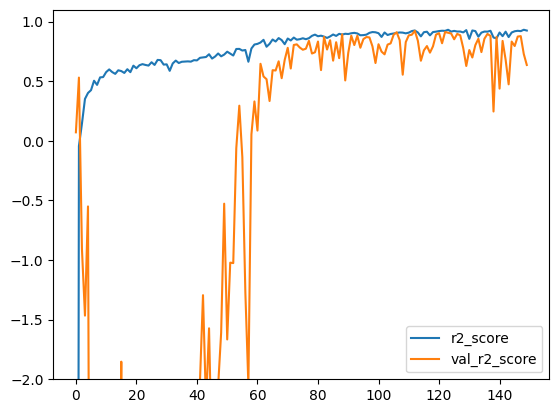

In [ ]:
history6[['loss', 'val_loss']].plot(ylim=[-0.001,0.005])
plt.show()

history6[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Extra-Practice Question: You Do NOT Need to Complete this Question

- For this question, you will need to do a little research on your own to use a new type of layer.

- Answer the same questions from Question 1 above, except you should use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM">LSTM layers</a>.
  
  - A suggestion is to use half the layer size from your above approach.
  
- Compare with dense layers and explain which model performs best.

$\rule{800pt}{20pt}$

# Question 2: Tune Your Hyperparameters

- This question focuses on using Keras Tuner to find the right set of hyperparameters.

- You should use at least two different Keras Tuner search methods such as the <b>Random Search Tuner</b> and the <b>Bayesian Optimization Tuner</b>.

- You should try to tune at least four different hyperparameters per search method.

  - These could include the number of layers, number of units per layer, the optimizer, the weight initialization, the activation functions, the normalization scheme, etc.

- Summarize your results and describe which search method performed better and what was the best performing model and top three models, as well as their hyperparameter choices.

In [ ]:
! pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

## MLP Search

In [ ]:
def build_MLPs(hyper_param):
  # hyperparam 1: number of hidden dense layers
  num_hidden_layers = hyper_param.Int("num_hidden_layers", min_value=0, max_value=10, default=2)
  # hyperparam 2: number of neurons per layer
  num_units = hyper_param.Int("num_units", min_value=5, max_value=40)
  # hyperparam 3: constant learning rate
  learning_rate = hyper_param.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  # hyperparam 4: choosing the optimizer algorithm
  optimizer = hyper_param.Choice("optimizer", values=["sgd", "adam", "rmsprop"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == "rmsprop":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

  # build the sequential model using the hyperparameter values
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Normalization())
  for num in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(units=num_units, activation="relu"))
  model.add(tf.keras.layers.Dense(units=1))

  # compile the model
  model.compile(
      loss="mse",
      optimizer=optimizer,
      metrics=[tf.keras.metrics.R2Score()]
  )

  return model

### Random Search

In [ ]:
MLP_random_search_tuner = kt.RandomSearch(build_MLPs,
                                      objective="val_loss", # check if it has val_r2_score or val_mse
                                      max_trials=10, # number of model configurations
                                      overwrite = True,
                                      seed=42)

MLP_random_search_tuner.search(X_sub_train, Y_sub_train, epochs=10,
                           validation_data=(X_validation, Y_validation))

Trial 10 Complete [00h 00m 05s]
val_loss: 0.0003562841156963259

Best val_loss So Far: 0.00017405908147338778
Total elapsed time: 00h 00m 38s


In [ ]:
top_three_MLP = MLP_random_search_tuner.get_best_models(num_models=3)
print(f"top three MLPs: \n {top_three_MLP}")

print("-"*50)

best_MLP = top_three_MLP[0]
print(f"best MLP: \n {best_MLP}")

top three MLPs: 
 [<keras.src.engine.sequential.Sequential object at 0x78eaba1f23b0>, <keras.src.engine.sequential.Sequential object at 0x78eaba8a3d90>, <keras.src.engine.sequential.Sequential object at 0x78eaba8a3ee0>]
--------------------------------------------------
best MLP: 


In [ ]:
top_three_MLP_params = MLP_random_search_tuner.get_best_hyperparameters(num_trials=3)
print(f"top three MLP params: \n {top_three_MLP_params[0].values, top_three_MLP_params[1].values, top_three_MLP_params[2].values}")

print("-"*50)

best_MLP_params = top_three_MLP_params[0].values
print(f"best MLP params: \n {best_MLP_params}")

top three MLP params: 
 ({'num_hidden_layers': 9, 'num_units': 17, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'}, {'num_hidden_layers': 5, 'num_units': 13, 'learning_rate': 0.00905127409782462, 'optimizer': 'adam'}, {'num_hidden_layers': 9, 'num_units': 21, 'learning_rate': 0.0005509513888645584, 'optimizer': 'rmsprop'})
--------------------------------------------------
best MLP params: 
 {'num_hidden_layers': 9, 'num_units': 17, 'learning_rate': 0.0012482904754698163, 'optimizer': 'sgd'}


### Bayesian Search

In [ ]:
MLP_bayesian_opt_tuner = kt.BayesianOptimization(build_MLPs,
                                            objective="val_loss",
                                            seed=42,
                                            max_trials=10,
                                            overwrite=True,
                                            alpha=1e-4, beta=2.6)

MLP_bayesian_opt_tuner.search(X_sub_train, Y_sub_train, epochs=10,
                           validation_data=(X_validation, Y_validation))

Trial 10 Complete [00h 00m 05s]
val_loss: 0.0003196148027200252

Best val_loss So Far: 0.0002016319485846907
Total elapsed time: 00h 00m 41s


In [ ]:
top_three_MLP = MLP_bayesian_opt_tuner.get_best_models(num_models=3)
print(f"top three MLPs: \n {top_three_MLP}")

print("-"*50)

best_MLP = top_three_MLP[0]
print(f"best MLP: \n {best_MLP}")

top three MLPs: 
 [<keras.src.engine.sequential.Sequential object at 0x78eab8f952a0>, <keras.src.engine.sequential.Sequential object at 0x78eab3fbafb0>, <keras.src.engine.sequential.Sequential object at 0x78eab3fba8c0>]
--------------------------------------------------
best MLP: 


In [ ]:
top_three_MLP_params = MLP_bayesian_opt_tuner.get_best_hyperparameters(num_trials=3)
print(f"top three MLP params: \n {top_three_MLP_params[0].values, top_three_MLP_params[1].values, top_three_MLP_params[2].values}")

print("-"*50)

best_MLP_params = top_three_MLP_params[0].values
print(f"best MLP params: \n {best_MLP_params}")

top three MLP params: 
 ({'num_hidden_layers': 6, 'num_units': 13, 'learning_rate': 0.00041268008323824807, 'optimizer': 'adam'}, {'num_hidden_layers': 10, 'num_units': 21, 'learning_rate': 0.0008960175671873151, 'optimizer': 'adam'}, {'num_hidden_layers': 10, 'num_units': 8, 'learning_rate': 0.008547485565344062, 'optimizer': 'sgd'})
--------------------------------------------------
best MLP params: 
 {'num_hidden_layers': 6, 'num_units': 13, 'learning_rate': 0.00041268008323824807, 'optimizer': 'adam'}


## NN Search

In [ ]:
def build_NN(hyper_param):
  # hyperparam 1: number of hidden dense layers
  num_hidden_layers = hyper_param.Int("num_hidden_layers", min_value=0, max_value=10, default=2)
  # hyperparam 2: number of neurons per layer
  num_units = hyper_param.Int("num_units", min_value=5, max_value=40)
  # hyperparam 3: constant learning rate
  learning_rate = hyper_param.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
  # hyperparam 4: choosing the optimizer algorithm
  optimizer = hyper_param.Choice("optimizer", values=["sgd", "adam", "rmsprop"])
  if optimizer == "sgd":
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer == "adam":
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  elif optimizer == "rmsprop":
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
  # hyperparam 5: choosing the activation function
  activation = hyper_param.Choice("activation", values=["relu", "leaky_relu", "swish"])
  if activation == "relu":
    activation = tf.keras.activations.relu
  elif activation == "leaky_relu":
    activation = tf.keras.layers.LeakyReLU(alpha=0.2)
  elif activation == "swish":
    activation = tf.keras.activations.swish
  # hyperparam 6: dropout rate
  dropout_rate = hyper_param.Float("dropout_rate", min_value=0, max_value=0.5)

  # build the sequential model using the hyperparameter values
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Normalization())
  for num in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(units=num_units, activation=activation))
    model.add(tf.keras.layers.Dropout(rate=dropout_rate))
  model.add(tf.keras.layers.Dense(units=1))

  # compile the model
  model.compile(
      loss="mse",
      optimizer=optimizer,
      metrics=[tf.keras.metrics.R2Score()]
  )

  return model

### Random Search

In [ ]:
NN_random_search_tuner = kt.RandomSearch(build_NN,
                                      objective="val_loss", # check if it has val_r2_score or val_mse
                                      max_trials=10, # number of model configurations
                                      overwrite = True,
                                      seed=42)

NN_random_search_tuner.search(X_sub_train, Y_sub_train, epochs=10,
                           validation_data=(X_validation, Y_validation))

Trial 10 Complete [00h 00m 05s]
val_loss: 0.0012329643359407783

Best val_loss So Far: 0.00017211545491591096
Total elapsed time: 00h 00m 38s


In [ ]:
top_three_NN = NN_random_search_tuner.get_best_models(num_models=3)
print(f"top three MLPs: \n {top_three_NN}")

print("-"*50)

best_NN = top_three_NN[0]
print(f"best MLP: \n {best_NN}")

top_three_NN_params = NN_random_search_tuner.get_best_hyperparameters(num_trials=3)
print(f"top three MLP params: \n {top_three_NN_params[0].values, top_three_NN_params[1].values, top_three_NN_params[2].values}")

print("-"*50)

best_NN_params = top_three_NN_params[0].values
print(f"best MLP params: \n {best_NN_params}")

top three MLPs: 
 [<keras.src.engine.sequential.Sequential object at 0x78eab38e8e50>, <keras.src.engine.sequential.Sequential object at 0x78eab2602d10>, <keras.src.engine.sequential.Sequential object at 0x78eab2600be0>]
--------------------------------------------------
best MLP: 
top three MLP params: 
 ({'num_hidden_layers': 3, 'num_units': 22, 'learning_rate': 0.007177664122743156, 'optimizer': 'adam', 'activation': 'leaky_relu', 'dropout_rate': 0.2073719996543395}, {'num_hidden_layers': 8, 'num_units': 12, 'learning_rate': 0.0038287047044982298, 'optimizer': 'sgd', 'activation': 'leaky_relu', 'dropout_rate': 0.04054533231194224}, {'num_hidden_layers': 6, 'num_units': 7, 'learning_rate': 0.0009887195863122636, 'optimizer': 'sgd', 'activation': 'swish', 'dropout_rate': 0.3085707383349761})
--------------------------------------------------
best MLP params: 
 {'num_hidden_layers': 3, 'num_units': 22, 'learning_rate': 0.007177664122743156, 'optimizer': 'adam', 'activation': 'leaky_relu

### Bayesian Search

In [ ]:
NN_bayesian_opt_tuner = kt.BayesianOptimization(build_NN,
                                            objective="val_loss",
                                            seed=42,
                                            max_trials=10,
                                            overwrite=True,
                                            alpha=1e-4, beta=2.6)

NN_bayesian_opt_tuner.search(X_sub_train, Y_sub_train, epochs=10,
                           validation_data=(X_validation, Y_validation))

Trial 10 Complete [00h 00m 04s]
val_loss: 0.0003112496924586594

Best val_loss So Far: 0.0002036212827078998
Total elapsed time: 00h 00m 35s


In [ ]:
top_three_NN = NN_bayesian_opt_tuner.get_best_models(num_models=3)
print(f"top three MLPs: \n {top_three_NN}")

print("-"*50)

best_NN = top_three_NN[0]
print(f"best MLP: \n {best_NN}")

top_three_NN_params = NN_bayesian_opt_tuner.get_best_hyperparameters(num_trials=3)
print(f"top three MLP params: \n {top_three_NN_params[0].values, top_three_NN_params[1].values, top_three_NN_params[2].values}")

print("-"*50)

best_NN_params = top_three_NN_params[0].values
print(f"best MLP params: \n {best_NN_params}")

top three MLPs: 
 [<keras.src.engine.sequential.Sequential object at 0x78eab20c0910>, <keras.src.engine.sequential.Sequential object at 0x78eab18e7550>, <keras.src.engine.sequential.Sequential object at 0x78eab092ebf0>]
--------------------------------------------------
best MLP: 
top three MLP params: 
 ({'num_hidden_layers': 2, 'num_units': 8, 'learning_rate': 0.0006951671294413008, 'optimizer': 'rmsprop', 'activation': 'leaky_relu', 'dropout_rate': 0.3800807391548872}, {'num_hidden_layers': 3, 'num_units': 22, 'learning_rate': 0.007177664122743156, 'optimizer': 'adam', 'activation': 'leaky_relu', 'dropout_rate': 0.2073719996543395}, {'num_hidden_layers': 10, 'num_units': 8, 'learning_rate': 0.008547485565344062, 'optimizer': 'sgd', 'activation': 'leaky_relu', 'dropout_rate': 0.11209273742366321})
--------------------------------------------------
best MLP params: 
 {'num_hidden_layers': 2, 'num_units': 8, 'learning_rate': 0.0006951671294413008, 'optimizer': 'rmsprop', 'activation': 

In [ ]:
# COMMENT
# In this case, contrary to what I was expecting, the random search is performing better.
# Indeed, with random search, the lowest loss achieved is 0.00017 while with bayesian search is 0.0002
# This is true both in the case of a simple MLP, with not activations and dropout, but also in the case of a more complex NN
# The best models and best parameters are printed in the respective sections
# I think i should run with more epochs or more values, but that will become computationally expensive

## Extra-Practice Question: You Do NOT Need to Complete this Question

- This question will ask you to write a simple continuous integration and continuous development (CI/CD) for the model.

- Your code should build new models if the mean-squared error (MSE) of last 12 months is going above a particular level.

- In the event of the model performing poorly, as described in the previous sentence, you write code that retrains the model and continues with your predictions.

- The procedure is:

  1. First, train for first 30 years. This is your base model. You should use your best network from Question 1 above.

  2. Next, continue using this base model while recording the past 12 months rolling MSE. You should continue to check if the MSE goes above a particular threshold (of your choosing), and in the event that it does pass the threhold, you should retrain your model on the most recent data and continue using this model.
  
  3. Repeat this process for your entire sample of data and report metrics associated with this CI/CD experiment.

# Question 3: Build at Least TWO Different Neural Networks To Predict Volatility Using the Functional API

- This focus of this question is on model architecture:

  - these models should not be sequential models,

  - they should be ones where there is some branching and you could not use the Sequential API (see examples from the in-class notebook if you need help getting started).

- You should test on the validation data and report your results about which architecture performed best.


- **Not Required:** Feel free to try to tune some hyperparameters for your architectures.

## Model 1

In [ ]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

# Input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Normalization layer
normalization_layer = tf.keras.layers.Normalization()(input_layer)

# Hidden layers
hidden_layer_1 = tf.keras.layers.Dense(units=30, activation="relu")(normalization_layer)
hidden_layer_2 = tf.keras.layers.Dense(units=30, activation="relu")(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(units=30, activation="relu")(hidden_layer_2)

# Concatenation layer
concat = tf.keras.layers.Concatenate()([normalization_layer, hidden_layer_3])

# Output layer
output = tf.keras.layers.Dense(units=1)(concat)

# Final model
model1 = tf.keras.Model(inputs=[input_layer], outputs=[output])

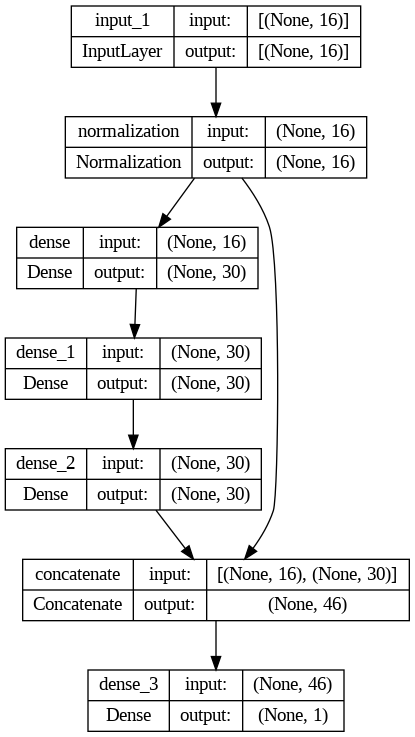

In [ ]:
tf.keras.utils.plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

history1 = model1.fit(X_sub_train, Y_sub_train,
                    epochs=150, batch_size=32,
                    validation_data=(X_validation, Y_validation))

history1 = pd.DataFrame(history1.history)

Epoch 1/150
30/30 [==============================] - 1s 9ms/step - loss: 1.5656 - r2_score: -1775.3048 - val_loss: 0.0255 - val_r2_score: -75.6456
Epoch 2/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0427 - r2_score: -47.4889 - val_loss: 0.0509 - val_r2_score: -151.7840
Epoch 3/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0116 - r2_score: -12.1813 - val_loss: 0.0131 - val_r2_score: -38.4228
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0054 - r2_score: -5.1683 - val_loss: 0.0097 - val_r2_score: -28.2022
Epoch 5/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0029 - r2_score: -2.3334 - val_loss: 0.0069 - val_r2_score: -19.8325
Epoch 6/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0019 - r2_score: -1.1265 - val_loss: 0.0048 - val_r2_score: -13.4389
Epoch 7/150
30/30 [==============================] - 0s 3ms/step - loss: 0.0012 - r2_score: -0.3375 - val_loss: 0.0036 - val_r2_sc

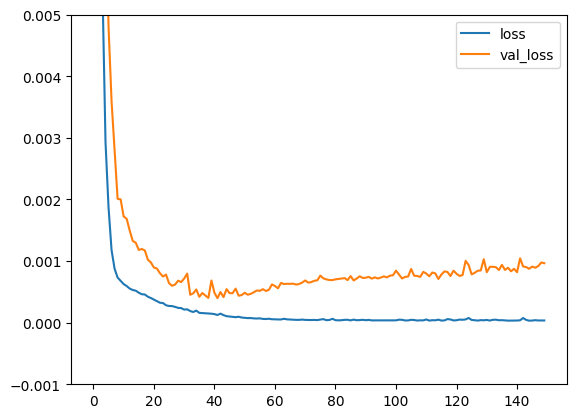

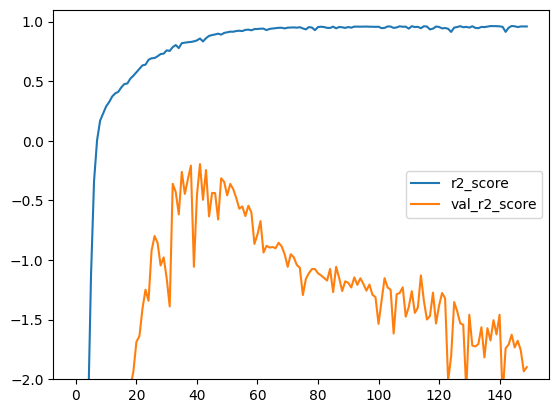

In [ ]:
history1[['loss', 'val_loss']].plot(ylim=[-0.001,0.005])
plt.show()

history1[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 2

In [ ]:
# Note: for the following architecture, I just took the previous one and impplemented tricks to improve the learning (e.g. kernel initialization, normalization and dropout)

tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

# Input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# Normalization layer
normalization_layer = tf.keras.layers.BatchNormalization()(input_layer)

# Hidden layers
hidden_layer_1 = tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal())(normalization_layer)
hidden_layer_1_norm = tf.keras.layers.BatchNormalization()(hidden_layer_1)
hidden_layer_1_dropout = tf.keras.layers.Dropout(0.3)(hidden_layer_1_norm)

hidden_layer_2 = tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal())(hidden_layer_1_dropout)
hidden_layer_2_norm = tf.keras.layers.BatchNormalization()(hidden_layer_2)
hidden_layer_2_dropout = tf.keras.layers.Dropout(0.3)(hidden_layer_2_norm)

hidden_layer_3 = tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal())(hidden_layer_2_dropout)
hidden_layer_3_norm = tf.keras.layers.BatchNormalization()(hidden_layer_3)
hidden_layer_3_dropout = tf.keras.layers.Dropout(0.3)(hidden_layer_3_norm)

# Concatenation layer
concat = tf.keras.layers.Concatenate()([normalization_layer, hidden_layer_3_dropout])

# Output layer
output = tf.keras.layers.Dense(units=1)(concat)

# Final model
model2 = tf.keras.Model(inputs=[input_layer], outputs=[output])

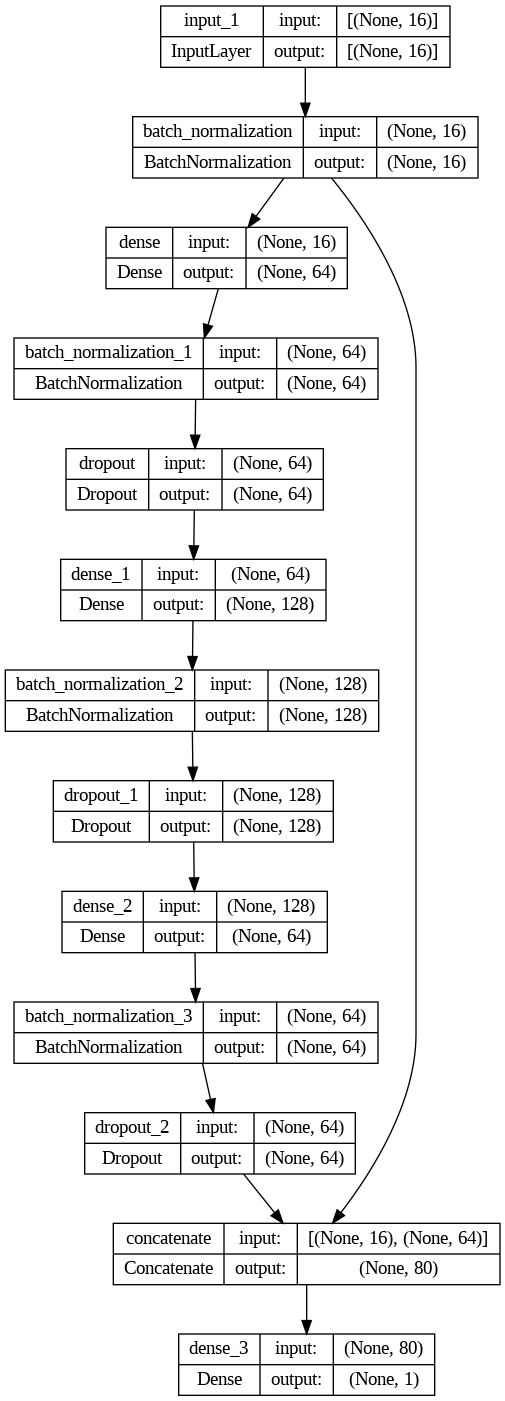

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

history2 = model2.fit(X_sub_train, Y_sub_train,
                    epochs=150, batch_size=32,
                    validation_data=(X_validation, Y_validation))

history2 = pd.DataFrame(history2.history)

Epoch 1/150
30/30 [==============================] - 2s 12ms/step - loss: 1.8377 - r2_score: -2084.0557 - val_loss: 1.1977 - val_r2_score: -3593.1736
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 1.1301 - r2_score: -1281.1665 - val_loss: 0.6122 - val_r2_score: -1836.2882
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 0.9872 - r2_score: -1119.0537 - val_loss: 0.4388 - val_r2_score: -1315.7010
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 0.8425 - r2_score: -954.8641 - val_loss: 0.1836 - val_r2_score: -550.0209
Epoch 5/150
30/30 [==============================] - 0s 4ms/step - loss: 0.6212 - r2_score: -703.8293 - val_loss: 0.0462 - val_r2_score: -137.7093
Epoch 6/150
30/30 [==============================] - 0s 4ms/step - loss: 0.5259 - r2_score: -595.6606 - val_loss: 0.0869 - val_r2_score: -259.7581
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 0.4313 - r2_score: -488.3510 - val_los

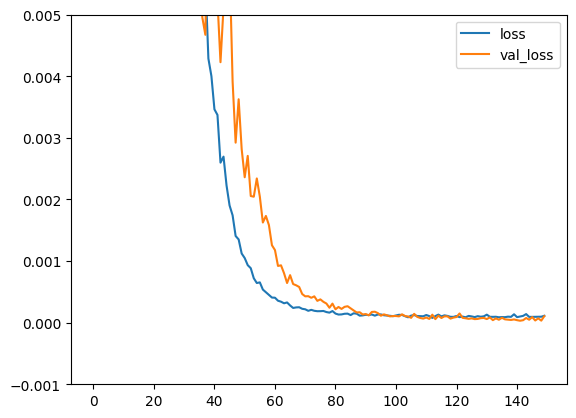

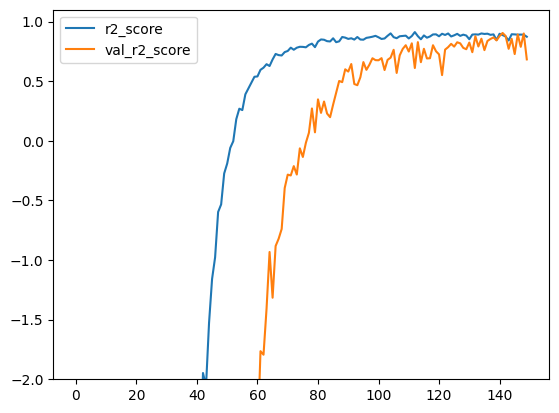

In [ ]:
history2[['loss', 'val_loss']].plot(ylim=[-0.001,0.005])
plt.show()

history2[['r2_score', 'val_r2_score']].plot(ylim=[-2,1.1])
plt.show()

## Model 3

In [ ]:
# Note: for the following architecture, I took inspriation from the internet, especially from architectures used with CNNs

tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

# Define the input layer
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))

# First parallel path with Batch Normalization
path_1 = tf.keras.layers.Dense(units=64, activation='relu')(input_layer)
path_1 = tf.keras.layers.BatchNormalization()(path_1)
path_1 = tf.keras.layers.Dense(units=32, activation='relu')(path_1)
path_1 = tf.keras.layers.BatchNormalization()(path_1)

# Second parallel path with Batch Normalization
path_2 = tf.keras.layers.Dense(units=64, activation='relu')(input_layer)
path_2 = tf.keras.layers.BatchNormalization()(path_2)
path_2 = tf.keras.layers.Dense(units=32, activation='relu')(path_2)
path_2 = tf.keras.layers.BatchNormalization()(path_2)

# Merge the paths
merged_path = tf.keras.layers.concatenate([path_1, path_2])

# Output layer
output = tf.keras.layers.Dense(units=1)(merged_path)

# Final model
model3 = tf.keras.Model(inputs=[input_layer], outputs=[output])

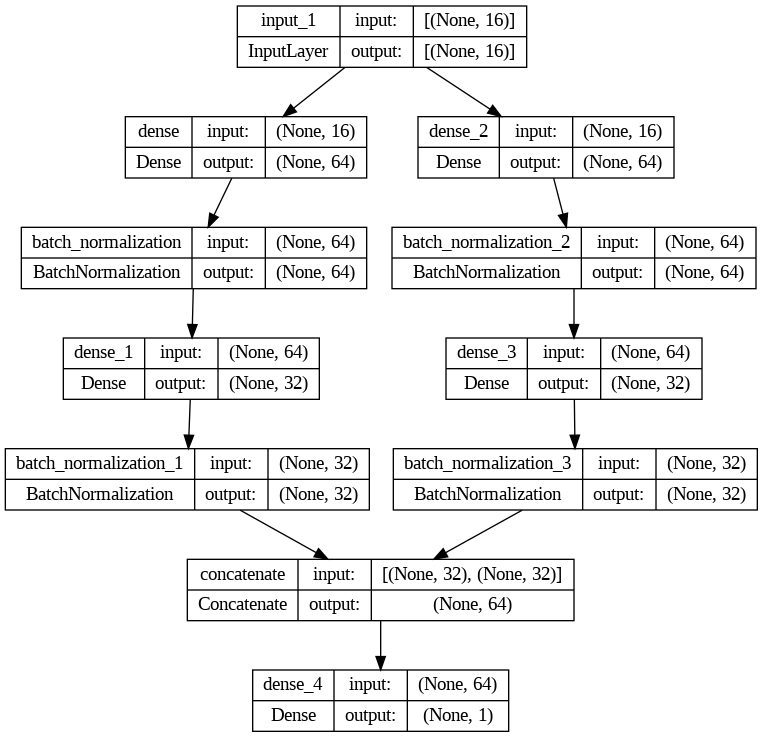

In [ ]:
tf.keras.utils.plot_model(model3, show_shapes=True, show_layer_names=True)

In [ ]:
model3.compile(loss="mse",
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=[tf.keras.metrics.R2Score()])

history3 = model3.fit(X_sub_train, Y_sub_train,
                    epochs=150, batch_size=32,
                    validation_data=(X_validation, Y_validation))

history3 = pd.DataFrame(history3.history)

Epoch 1/150
30/30 [==============================] - 2s 10ms/step - loss: 0.3703 - r2_score: -419.1573 - val_loss: 0.0348 - val_r2_score: -103.3243
Epoch 2/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0675 - r2_score: -75.6325 - val_loss: 0.0025 - val_r2_score: -6.5534
Epoch 3/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0456 - r2_score: -50.7804 - val_loss: 0.0012 - val_r2_score: -2.5040
Epoch 4/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0333 - r2_score: -36.8389 - val_loss: 0.0025 - val_r2_score: -6.5855
Epoch 5/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0323 - r2_score: -35.6404 - val_loss: 0.0361 - val_r2_score: -107.4054
Epoch 6/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0235 - r2_score: -25.6385 - val_loss: 0.0597 - val_r2_score: -178.2709
Epoch 7/150
30/30 [==============================] - 0s 4ms/step - loss: 0.0204 - r2_score: -22.1373 - val_loss: 0.0084 - val_r2

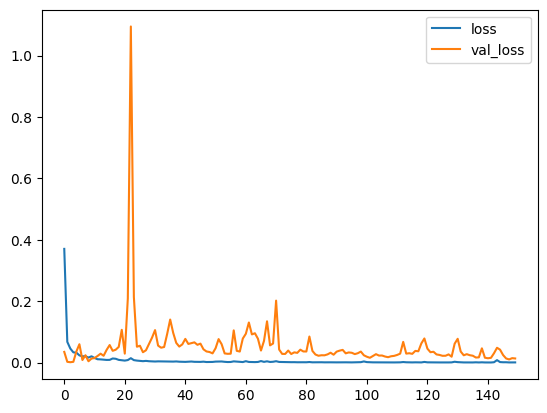

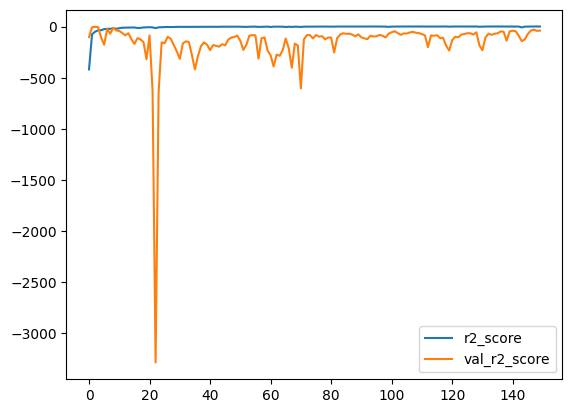

In [ ]:
history3[['loss', 'val_loss']].plot()
plt.show()

history3[['r2_score', 'val_r2_score']].plot()
plt.show()

In [ ]:
# the first model seems to be overfitting, while the second model peforms way better probably thanks to the tricks. the third model has a very high variance in the metrics.

$\rule{800pt}{20pt}$